In [1]:
%matplotlib widget

cld
<class 'pandas.core.frame.DataFrame'>
[[37.1 39.5 41.7 43.9 45.2]
 [40.3 42.9 44.9 46.9 48. ]
 [43.  45.6 47.9 49.7 50.6]
 [45.  47.7 49.8 51.8 52.2]
 [47.  49.4 48.8 50.3 50.6]
 [45.6 47.9 49.  50.7 51.2]]
[['crm20_lim20' 'crm10_lim20' 'cr0_lim20' 'crp10_lim20' 'crp20_lim20']
 ['crm20_lim10' 'crm10_lim10' 'cr0_lim10' 'crp10_lim10' 'crp20_lim10']
 ['crm20_li0' 'crm10_li0' 'cr0_li0' 'crp10_li0' 'crp20_li0']
 ['crm20_lip10' 'crm10_lip10' 'cr0_lip10' 'crp10_lip10' 'crp20_lip10']
 ['crm20_lip20' 'crm10_lip20' 'cr0_lip20' 'crp10_lip20' 'crp20_lip20']
 ['crm20_lip30' 'crm10_lip30' 'cr0_lip30' 'crp10_lip30' 'crp20_lip30']]


/tmp/ipykernel_11704/1868484165.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['ac_id', 'method', 'I_value', 'rmerge_value'], sep=('  '))


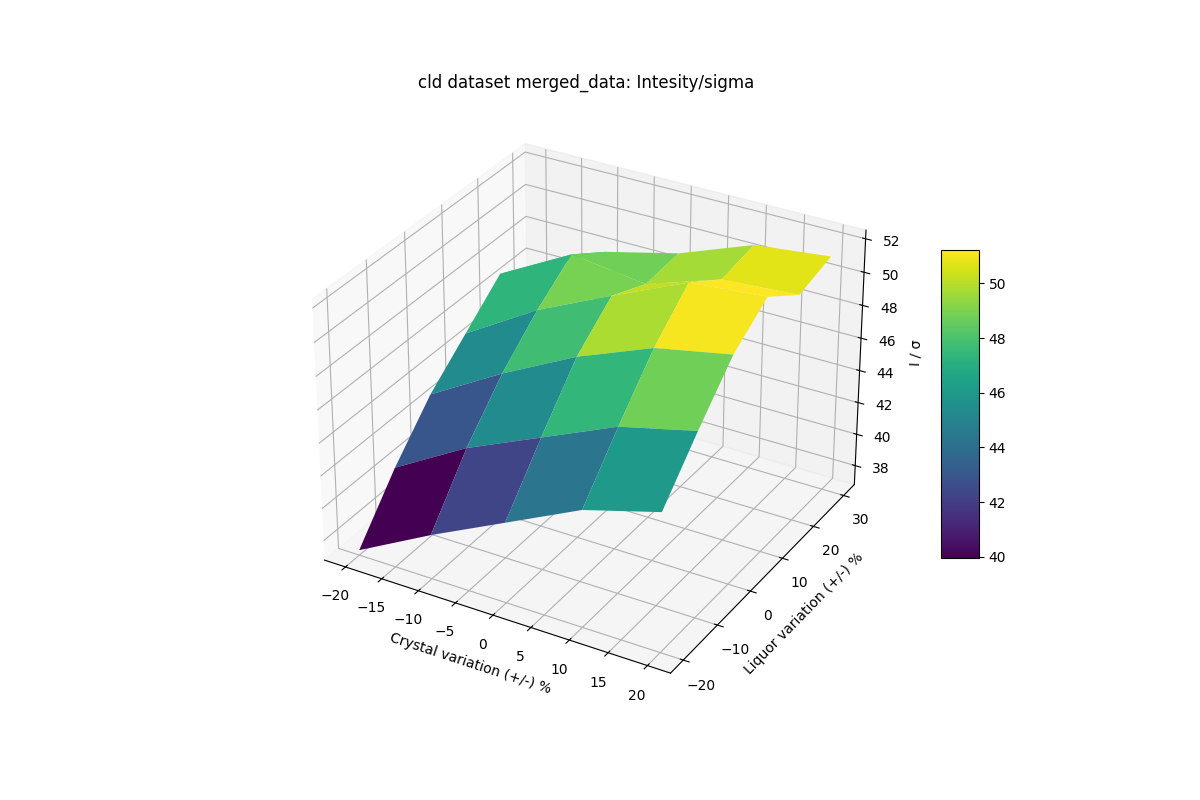

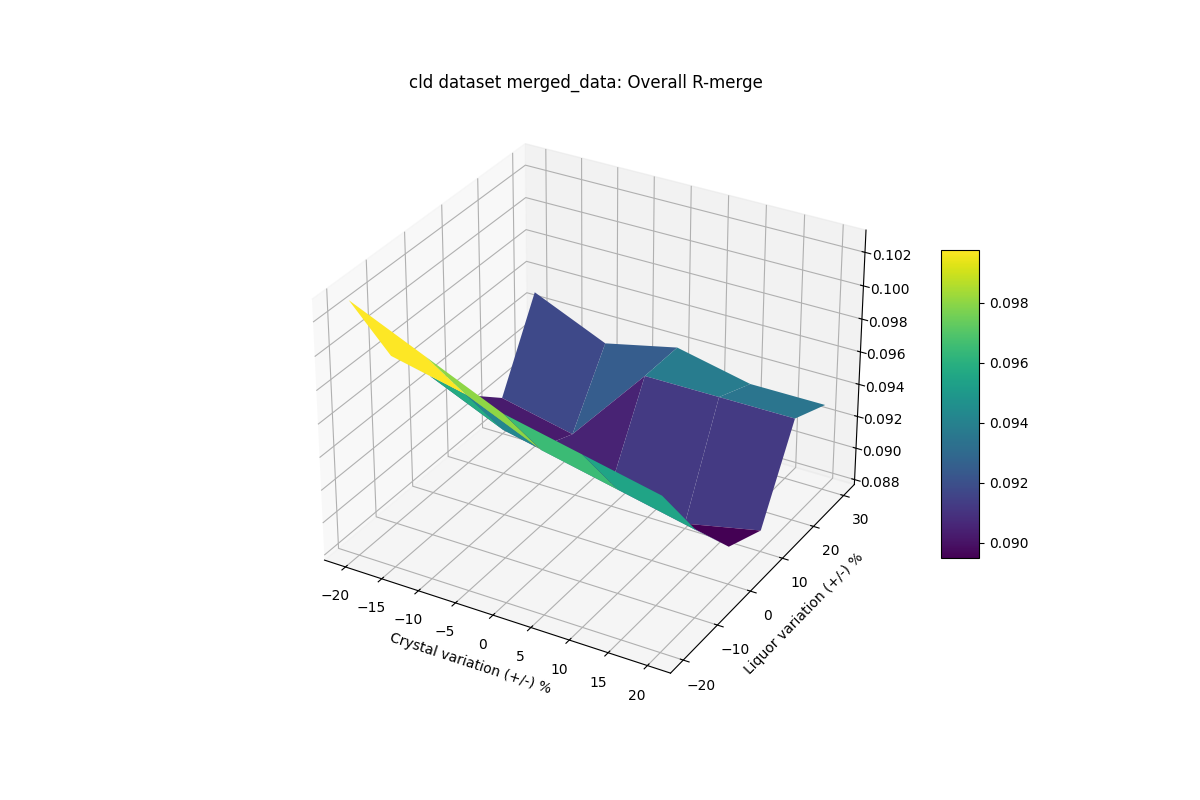

[[37.1 39.5 41.7 43.9 45.2]
 [40.3 42.9 44.9 46.9 48. ]
 [43.  45.6 47.9 49.7 50.6]
 [45.  47.7 49.8 51.8 52.2]
 [47.  49.4 48.8 50.3 50.6]
 [45.6 47.9 49.  50.7 51.2]]


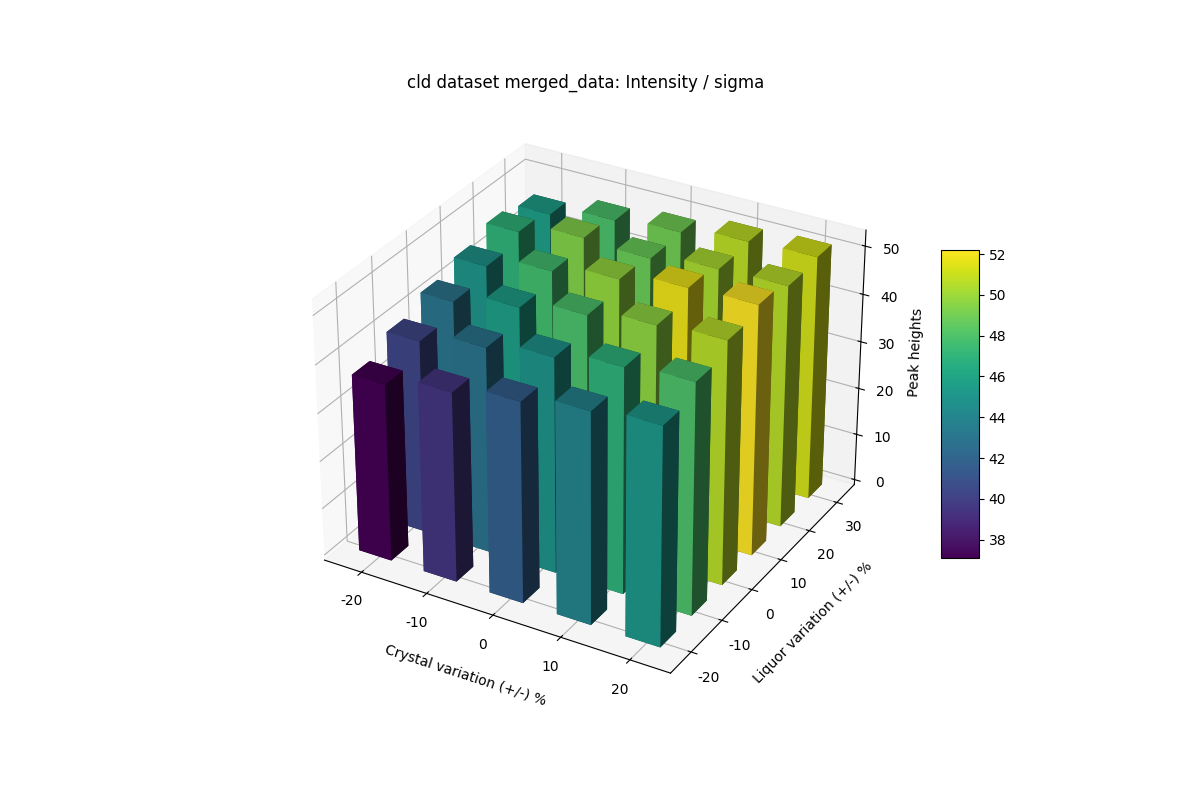

[[0.103 0.101 0.099 0.098 0.097]
 [0.098 0.097 0.095 0.094 0.093]
 [0.095 0.093 0.092 0.091 0.09 ]
 [0.092 0.09  0.089 0.088 0.089]
 [0.09  0.089 0.094 0.094 0.094]
 [0.095 0.093 0.094 0.093 0.093]]


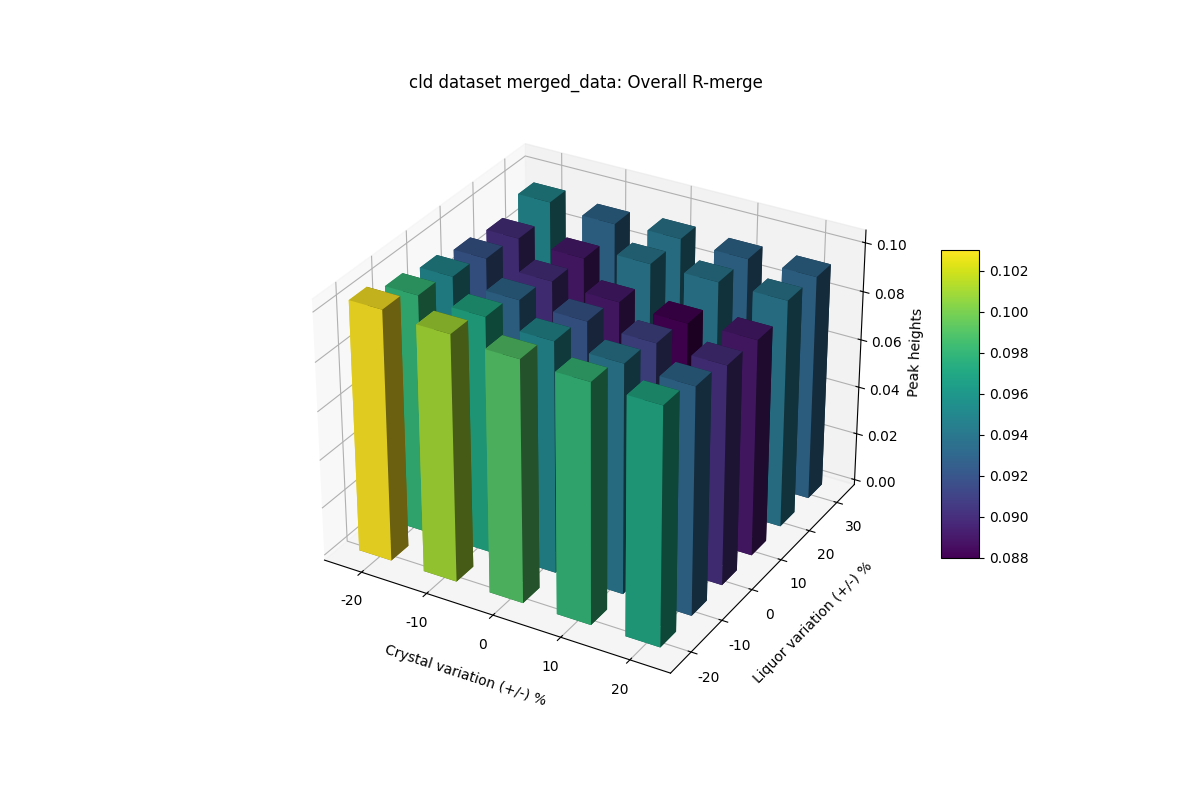

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
from mpl_toolkits import mplot3d
import os
import matplotlib

ac_labels = [
    "crm20_lim20","crm10_lim20","cr0_lim20","crp10_lim20","crp20_lim20",
    "crm20_lim10","crm10_lim10","cr0_lim10","crp10_lim10","crp20_lim10",
    "crm20_li0",  "crm10_li0",  "cr0_li0",  "crp10_li0",  "crp20_li0",
    "crm20_lip10","crm10_lip10","cr0_lip10","crp10_lip10","crp20_lip10",
    "crm20_lip20","crm10_lip20","cr0_lip20","crp10_lip20","crp20_lip20",
    "crm20_lip30","crm10_lip30","cr0_lip30","crp10_lip30","crp20_lip30"
    ]

parent_dir = "/dls/i23/data/2024/cm37273-1/processing/tihana/cld"
#parent_dir = input("Path to crystal directory: ")
crystal = (parent_dir.split("/"))[-1]
print(crystal)

# Make directory for plots
if not os.path.exists(os.path.join(parent_dir, 'plots')):
    os.mkdir(os.path.join(parent_dir, 'plots'))

dataset_path = "/dls/i23/data/2024/cm37273-1/processing/tihana/cld/anacor/merged_data"
#dataset_path = input("Path to dataset in anacor: ")
dataset = dataset_path.split("/")
dataset = dataset[-1]

# Put the path to your data files here
file_paths = [
    f'/dls/i23/data/2024/cm37273-1/processing/tihana/cld/csv_files/{dataset}_I_and_r_merge.csv'#,
    #f'/dls/i23/data/2024/cm37273-1/processing/tihana/cld/csv_files/{dataset}_r_merge.csv'
]
file_paths = [f'{os.path.join(parent_dir, "csv_files", f"{dataset}_I_and_r_merge.csv")}']

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = [':acsh:', ':ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['ac_id', 'method', 'I_value', 'rmerge_value'], sep=('  '))
    all_data.append(df)

print(type(df))
df = pd.DataFrame(df)
ac = df[df['method']==':ac:']
ac = ac.set_index(['ac_id']).reindex(ac_labels).reset_index()
acsh = df[df['method']==':acsh:']
acsh = acsh.set_index(['ac_id']).reindex(ac_labels).reset_index()

result1 = ac['I_value']
result2 = ac['rmerge_value']
indexes = ac['ac_id'].to_list()
result3 = acsh['I_value']
result4 = acsh['rmerge_value']

# Create a new DataFrame with the results
results_ac = pd.DataFrame({'Intensity/sigma': result1, 'Overall R-merge': result2})
results_acsh = pd.DataFrame({'Intensity/sigma': result3, 'Overall R-merge': result4})

# Create an array with the length of the DataFrame
#y = np.arange(len(results_df))
y = ac['ac_id'].to_list()

ylabels = np.array([-20, -10, 0, 10, 20, 30])
xlabels = np.array([-20, -10, 0, 10, 20])
X, Y = np.meshgrid(xlabels, ylabels)

isig_data = results_ac['Intensity/sigma']
isig = np.reshape(isig_data.to_list(), (6,5))
print(isig)
indexes = np.reshape(indexes, (6,5))
print(indexes)

rmerge_data = results_ac['Overall R-merge']
rmerge = np.reshape(rmerge_data.to_list(), (6,5))


# 3D CONTOUR PLOT

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, isig, 50, cmap='jet')
surf_I = ax.plot_surface(X, Y, isig, cmap='viridis')
ax.set_ylabel('Liquor variation (+/-) %')
ax.set_xlabel('Crystal variation (+/-) %')
ax.set_zlabel('I / σ')
plt.title(f'{crystal} dataset {dataset}: Intesity/sigma')
fig.colorbar(surf_I, shrink=0.5, aspect=8)
#fig.colorbar(plt.cm.ScalarMappable(cmap = 'jet'), ax = ax)
plt.savefig(f"{parent_dir}/plots/{dataset}_I_3D_contour.png")
plt.show()


fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)
ax = plt.axes(projection='3d')
surf_r = ax.plot_surface(X, Y, rmerge, cmap='viridis')
#ax.contour3D(X, Y, rmerge, 50, cmap='jet')
ax.set_ylabel('Liquor variation (+/-) %')
ax.set_xlabel('Crystal variation (+/-) %')
#ax.set_zlabel('R-m')
fig.colorbar(surf_r, shrink=0.5, aspect=8)
plt.title(f'{crystal} dataset {dataset}: Overall R-merge')
plt.savefig(f"{parent_dir}/plots/{dataset}_rm_3D_contour.png")
plt.show()


# 3D BAR PLOT

xpos = np.arange(xlabels.shape[0])
ypos = np.arange(ylabels.shape[0])
xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

dx=0.5
dy=0.5

# I / SIGMA

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)
ax1=fig.add_subplot(111, projection='3d')
ax1.set_ylabel('Liquor variation (+/-) %', labelpad=10)
ax1.set_xlabel('Crystal variation (+/-) %', labelpad=10)
ax1.set_zlabel('Peak heights')

zpos_isig = isig.ravel()
dz=zpos_isig
print(isig)

ax1.xaxis.set_ticks(xpos + dx/2.)
ax1.xaxis.set_ticklabels(xlabels)

ax1.yaxis.set_ticks(ypos + dy/2.)
ax1.yaxis.set_ticklabels(ylabels)

norm_data = (np.array(isig_data) - np.min(isig_data)) / (np.max(isig_data) - np.min(isig_data))
norm = matplotlib.colors.Normalize(vmin=isig_data.min(), vmax=isig_data.max())
colors = cm.viridis(norm_data)
bar = ax1.bar3d(xposM.ravel(), yposM.ravel(), zpos_isig*0, dx, dy, dz, color=colors, cmap=plt.cm.viridis, norm=norm)
fig.colorbar(bar, ax=ax1, shrink=0.5, aspect=8)
plt.title(f'{crystal} dataset {dataset}: Intensity / sigma')
plt.savefig(f"{parent_dir}/plots/{dataset}_I_3D_bar.png")
plt.show()

# R-MERGE

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)
ax1=fig.add_subplot(111, projection='3d')
ax1.set_ylabel('Liquor variation (+/-) %', labelpad=10)
ax1.set_xlabel('Crystal variation (+/-) %', labelpad=10)
ax1.set_zlabel('Peak heights')

zpos_rm = rmerge.ravel()
dz=zpos_rm
print(rmerge)

ax1.xaxis.set_ticks(xpos + dx/2.)
ax1.xaxis.set_ticklabels(xlabels)

ax1.yaxis.set_ticks(ypos + dy/2.)
ax1.yaxis.set_ticklabels(ylabels)

norm_data = (np.array(rmerge_data) - np.min(rmerge_data)) / (np.max(rmerge_data) - np.min(rmerge_data))
norm = matplotlib.colors.Normalize(vmin=rmerge_data.min(), vmax=rmerge_data.max())
colors = cm.viridis(norm_data)
bar = ax1.bar3d(xposM.ravel(), yposM.ravel(), zpos_isig*0, dx, dy, dz, color=colors, cmap=plt.cm.viridis, norm=norm)
fig.colorbar(bar, ax=ax1, shrink=0.5, aspect=8)
plt.title(f'{crystal} dataset {dataset}: Overall R-merge')
plt.savefig(f"{parent_dir}/plots/{dataset}_rm_3D_bar.png")
plt.show()